<a href="https://colab.research.google.com/github/jaaaamj0711/kaggle_study/blob/master/Bank%20Marketing/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/drive/MyDrive/bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Categorical Variable

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

plt.style.use('seaborn-whitegrid')

In [15]:
data['age'].value_counts().index

Int64Index([31, 32, 34, 33, 35, 30, 36, 37, 38, 39, 29, 40, 41, 42, 28, 46, 47,
            45, 43, 27, 49, 44, 26, 48, 52, 53, 55, 51, 50, 54, 59, 57, 56, 60,
            25, 58, 24, 23, 61, 22, 62, 63, 64, 77, 21, 73, 66, 67, 72, 65, 71,
            68, 70, 76, 20, 69, 78, 74, 75, 80, 19, 79, 82, 81, 18, 83, 86, 85,
            84, 87, 88, 92, 93, 90, 89, 95],
           dtype='int64')

In [59]:
def bar_plot(columns):
  col = data[columns].value_counts()
  plt.figure(figsize=(14, 5))
  sns.barplot(x=col.index, y=col)
  plt.xticks(rotation=45, fontsize=12)
  plt.yticks(fontsize=12)
  plt.ylabel(" ")
  plt.title(columns, fontsize=20)
  plt.show()

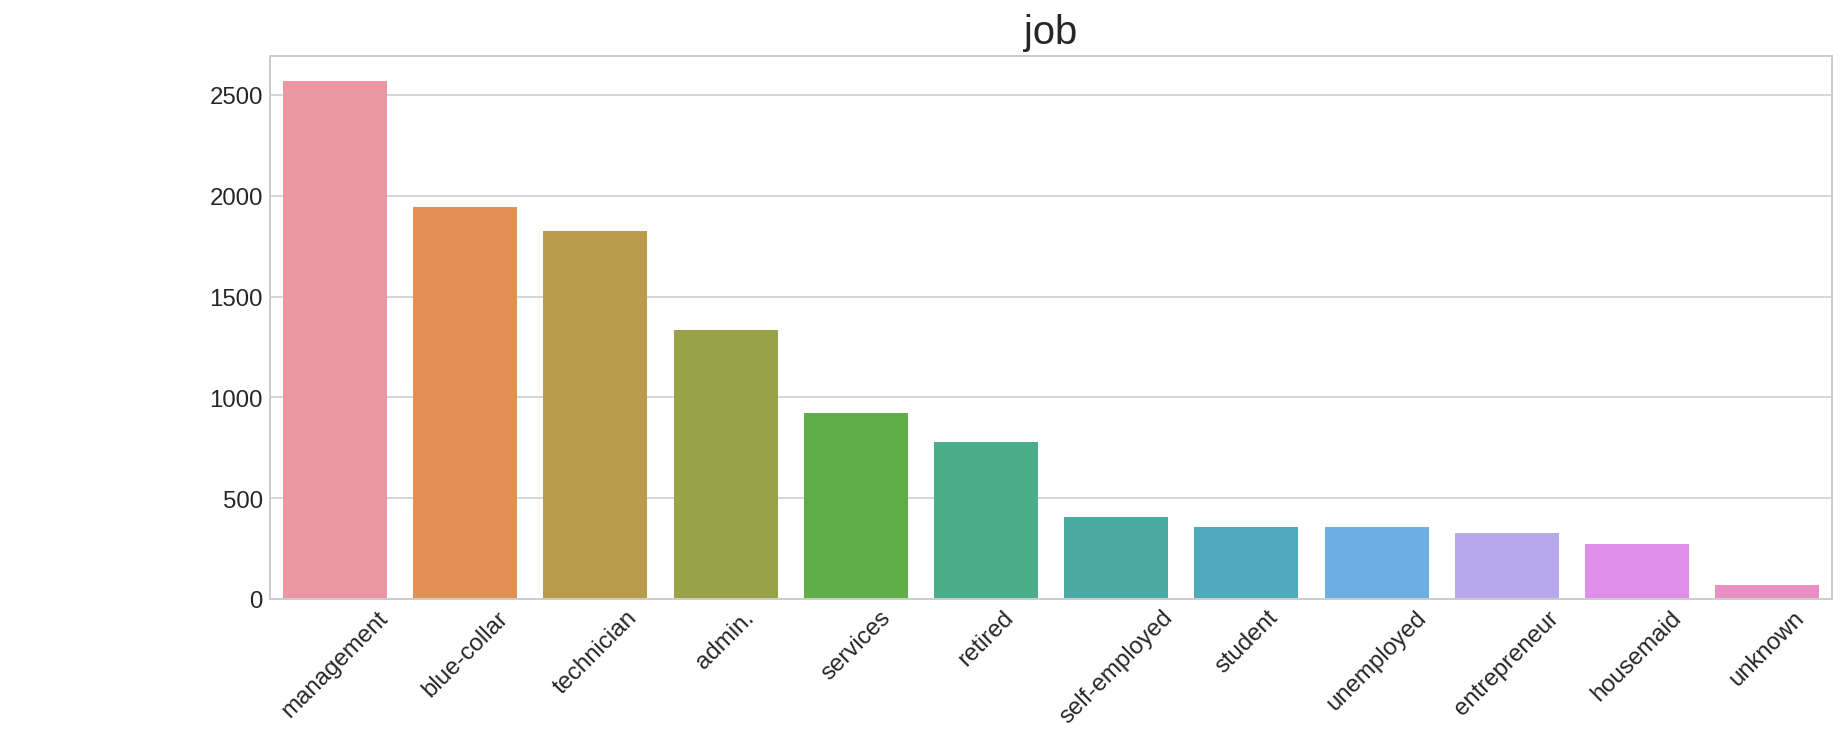

In [60]:
bar_plot("job")

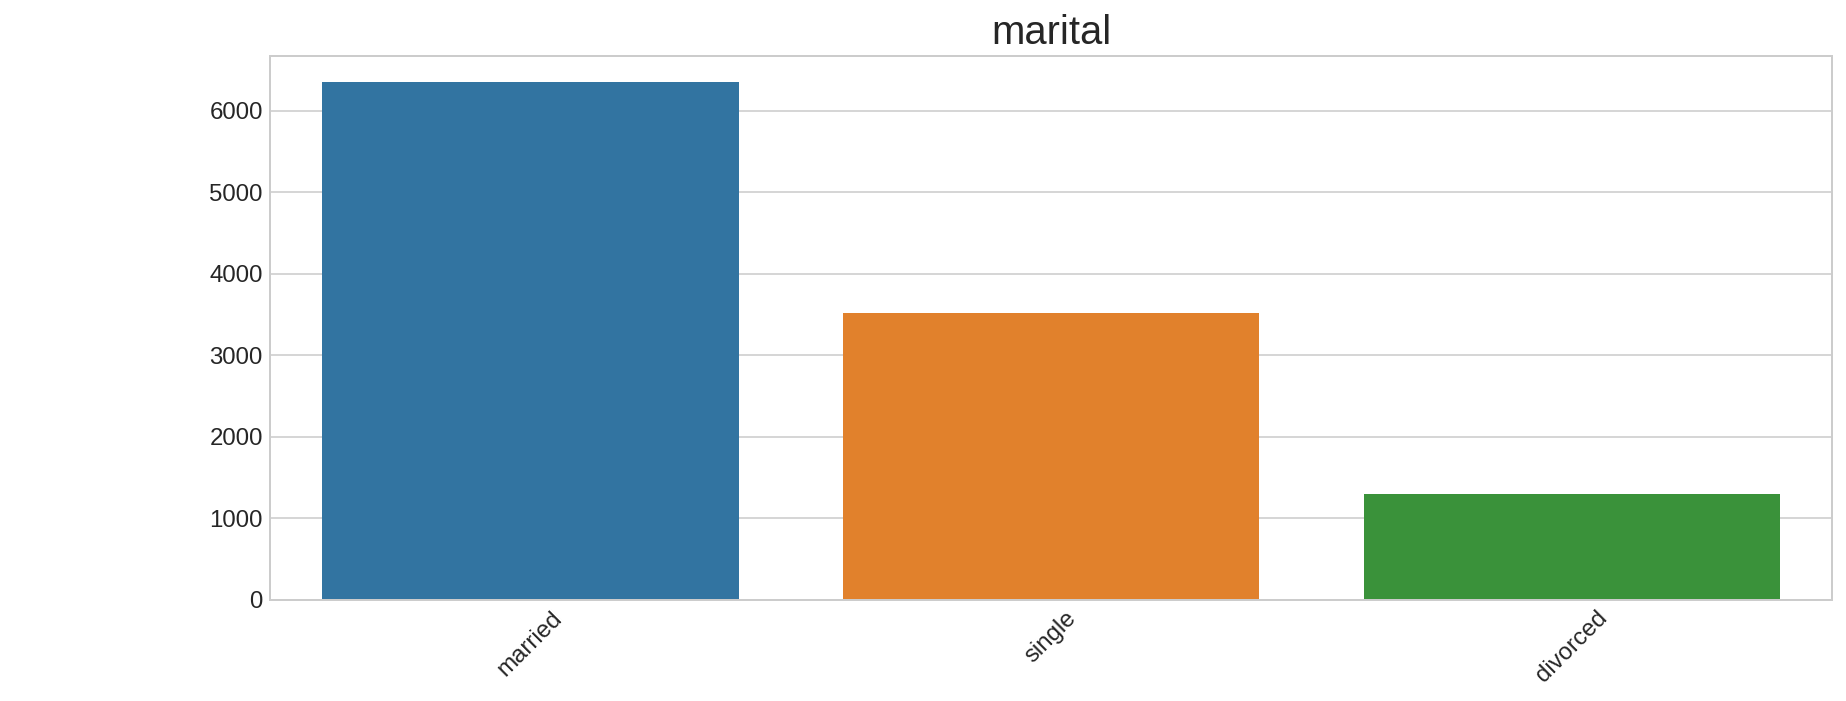

In [61]:
bar_plot('marital')

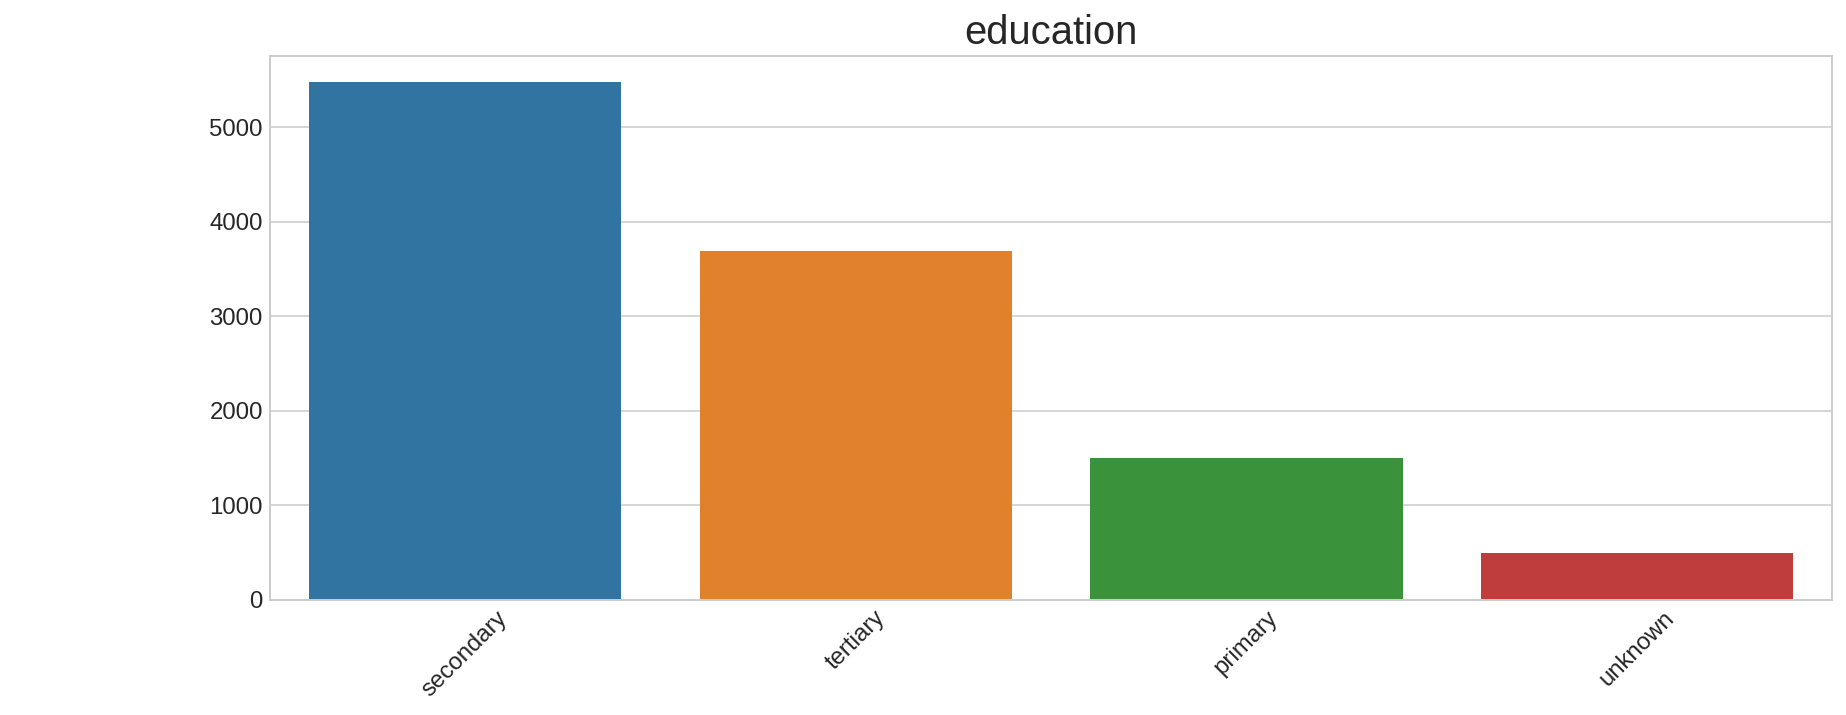

In [62]:
bar_plot("education")

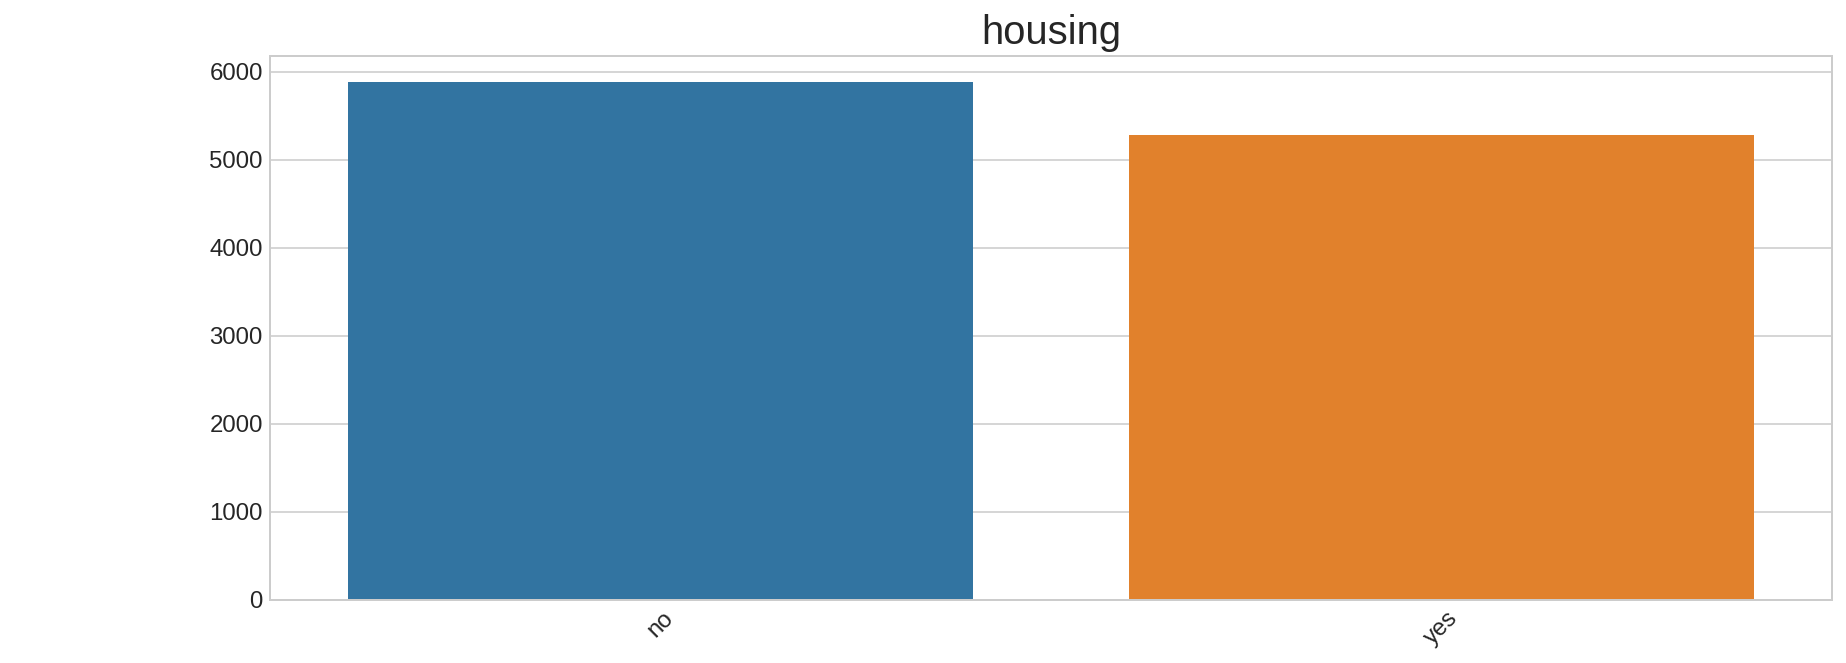

In [63]:
bar_plot('housing')

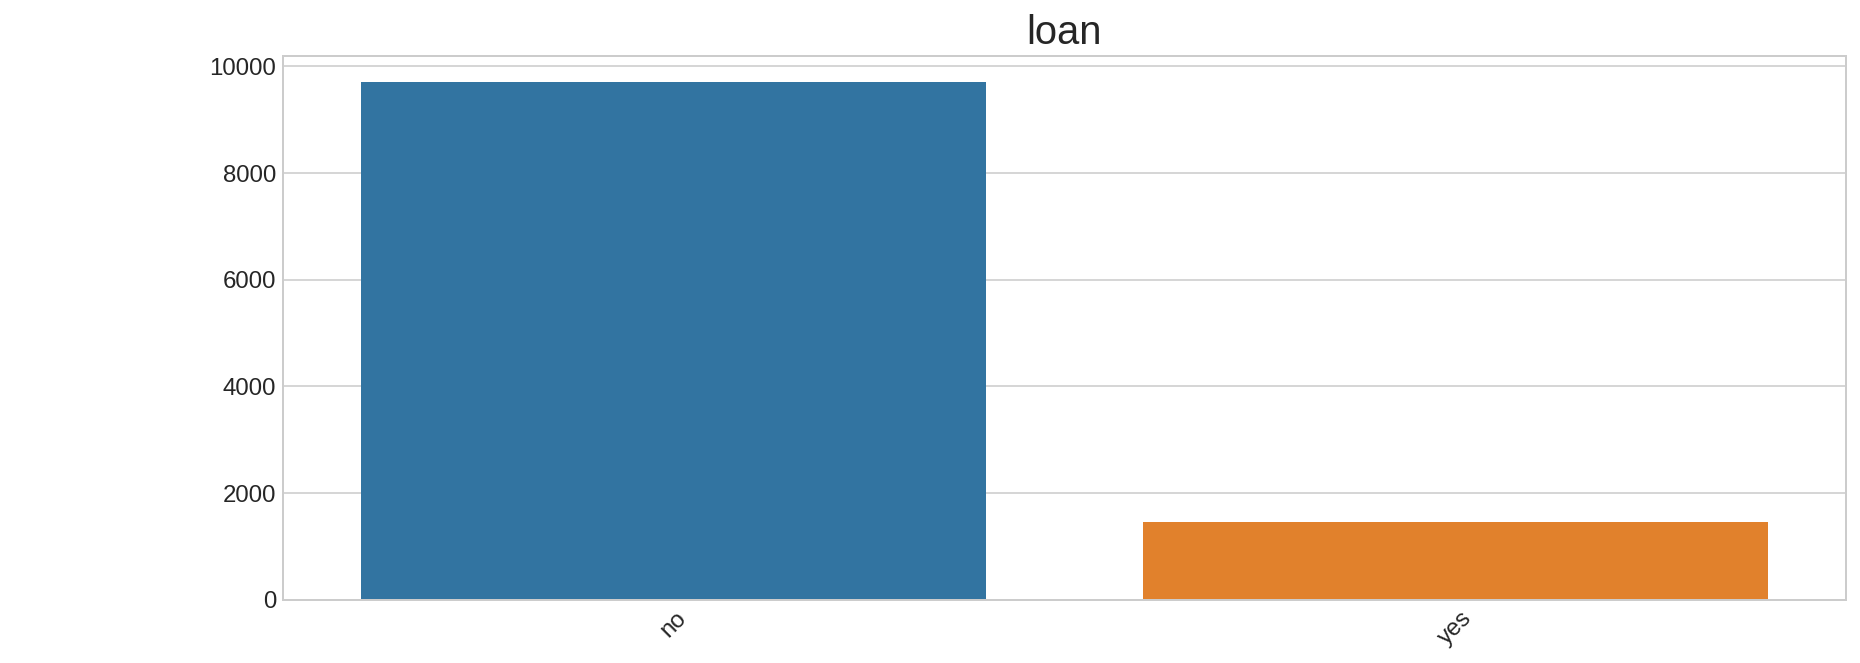

In [64]:
bar_plot("loan")

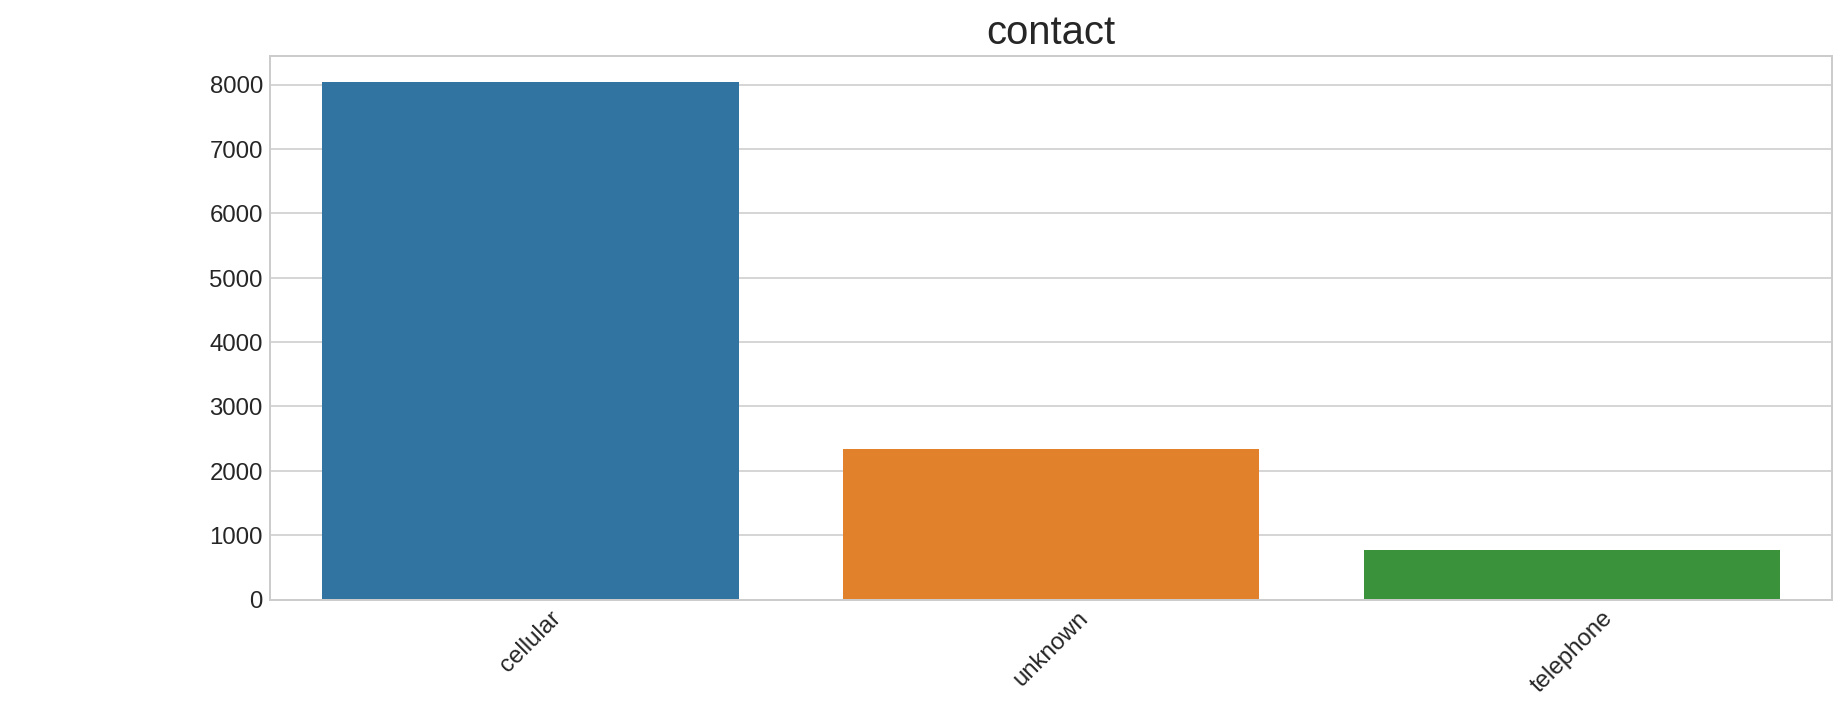

In [65]:
bar_plot("contact")

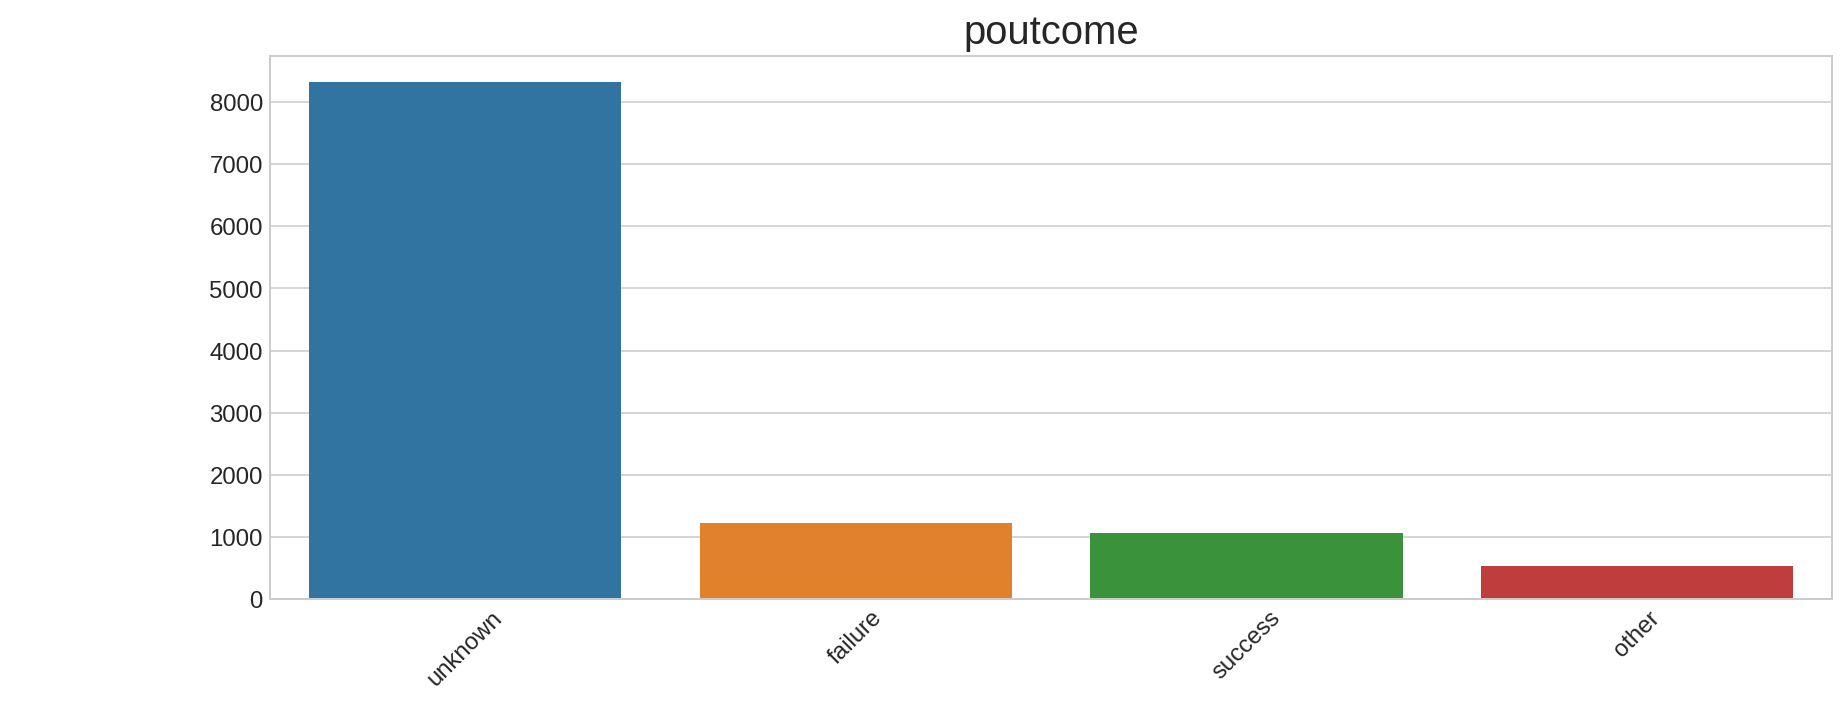

In [66]:
bar_plot("poutcome")

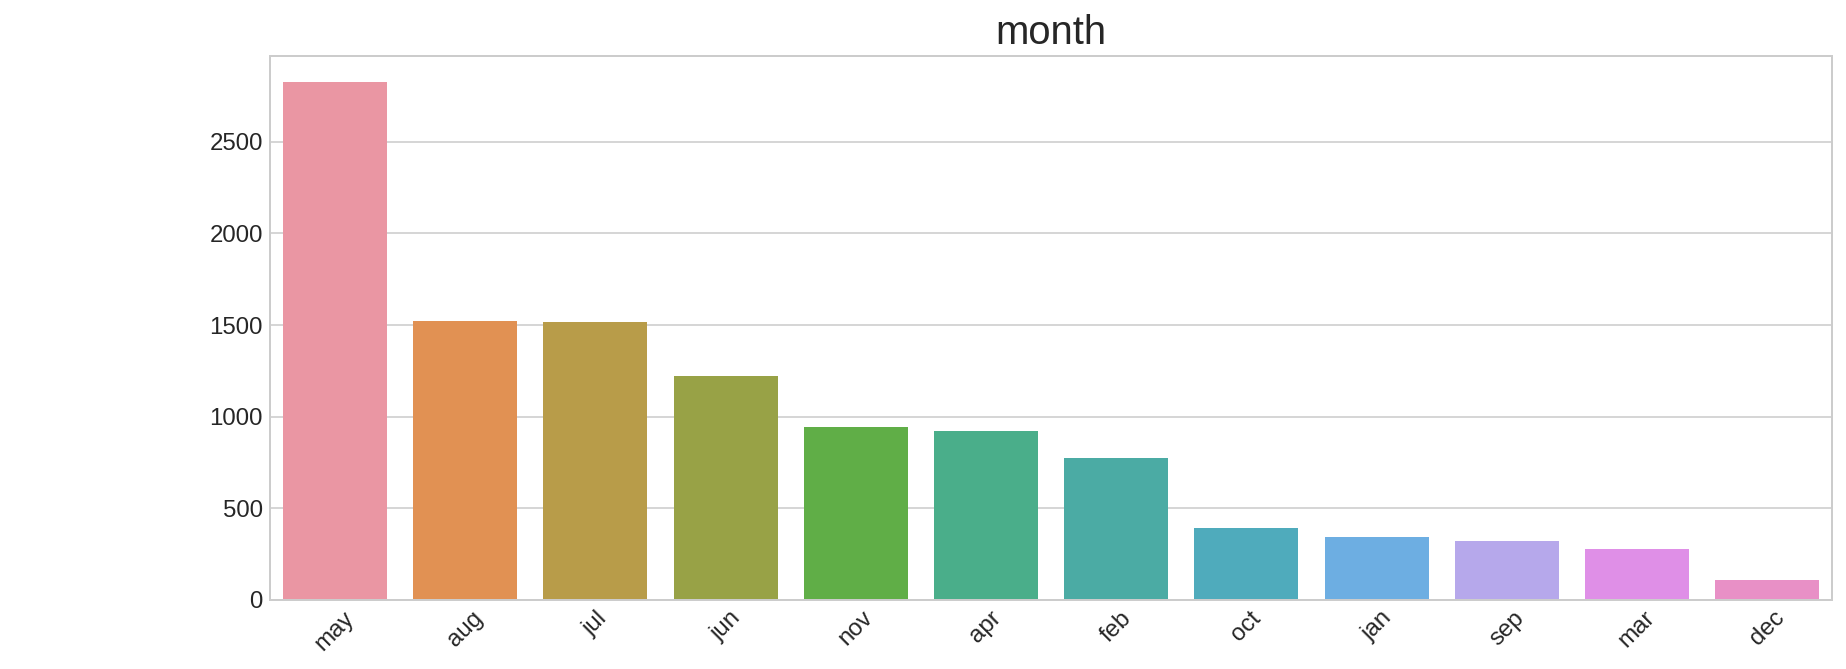

In [67]:
bar_plot("month")

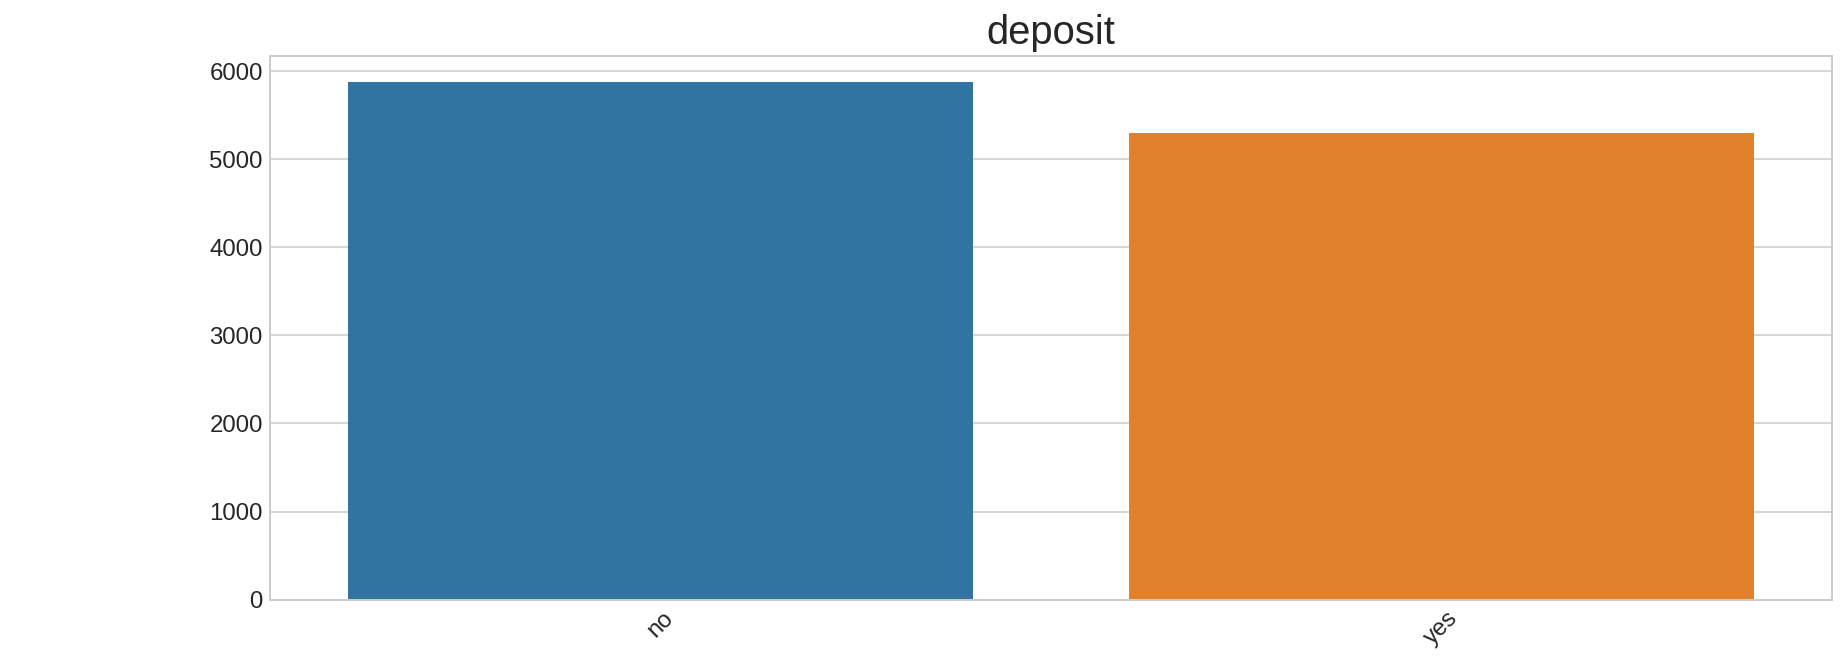

In [68]:
bar_plot("deposit")